<h1>Simon, Searchlight, No Game: Between Participants, Equal Distributions, 4 Rounds</h1>

In [55]:
import os 
import pandas as pd
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt

from util.survey_structure import FSS_SURVEY_STATEMENTS
from util.simon_exposures_counter import simon_exposures_counter

In [56]:
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(font_scale=2)

In [57]:
SEARCHLIGHT_DATA_PATH = "./data/10-participants-4-rounds/searchlight.db"
NO_GAME_DATA_PATH = "./data/10-participants-4-rounds/no-game.db"
SIMON_DATA_PATH = "./data/10-participants-4-rounds/simon.db"

In [58]:
FOLDER_NAME = "10-participants-4-memory-tests-results"

In [59]:
# Note: this will all be reassigned to actual datasets below 
TRIAL_TABLE_NAME = "table_trialLog"
DEMOGRAPHICS = "questionnaire_demographics"
PARTICIPANT = "participant"
PROGRESS = "progress"

In [60]:
FSS_SURVEY_ONE_NO_GAME = "questionnaire_questionnaire_fss_no_game_1"
FSS_SURVEY_TWO_NO_GAME = "questionnaire_questionnaire_fss_no_game_2"
FSS_SURVEY_THREE_NO_GAME = "questionnaire_questionnaire_fss_no_game_3"
FSS_SURVEY_FOUR_NO_GAME = "questionnaire_questionnaire_fss_no_game_4"
FSS_SURVEY_ONE_SIMON = "questionnaire_modified_fss_1"
FSS_SURVEY_TWO_SIMON = "questionnaire_modified_fss_2"
FSS_SURVEY_THREE_SIMON = "questionnaire_modified_fss_3"
FSS_SURVEY_FOUR_SIMON = "questionnaire_modified_fss_4"
FSS_SURVEY_ONE = "questionnaire_questionnaire_fss_1"
FSS_SURVEY_TWO= "questionnaire_questionnaire_fss_2"
FSS_SURVEY_THREE = "questionnaire_questionnaire_fss_3"
FSS_SURVEY_FOUR = "questionnaire_questionnaire_fss_4"

<h2>Read in No Game</h2>

In [61]:
no_game_connection = sqlite3.connect(NO_GAME_DATA_PATH)
cursor = no_game_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_questionnaire_fss_no_game_1',), ('questionnaire_questionnaire_fss_no_game_4',), ('questionnaire_prolific_start',), ('questionnaire_questionnaire_fss_2',), ('questionnaire_questionnaire_fss_no_game_3',), ('questionnaire_questionnaire_fss_1',), ('questionnaire_demographics',), ('questionnaire_questionnaire_fss_3',), ('questionnaire_questionnaire_fss_no_game_2',), ('table_trialLog',), ('table_streamLog',)]


In [62]:
NO_GAME_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", no_game_connection)
NO_GAME_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", no_game_connection)
NO_GAME_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE_NO_GAME}", no_game_connection)
NO_GAME_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO_NO_GAME}", no_game_connection)
NO_GAME_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE_NO_GAME}", no_game_connection)
NO_GAME_FSS_FOUR = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_FOUR_NO_GAME}", no_game_connection)
NO_GAME_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", no_game_connection)
NO_GAME_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", no_game_connection)
no_game_connection.close()

In [63]:
NO_GAME_FSS_ONE['breakpoint'] = 1
NO_GAME_FSS_TWO['breakpoint'] = 2
NO_GAME_FSS_THREE['breakpoint'] = 3
NO_GAME_FSS_FOUR['breakpoint'] = 4

NO_GAME_SURVEY = pd.concat([NO_GAME_FSS_ONE, NO_GAME_FSS_TWO, NO_GAME_FSS_THREE, NO_GAME_FSS_FOUR], ignore_index=True)

<h2>Read in Searchlight Data</h2>

In [64]:
searchlight_connection = sqlite3.connect(SEARCHLIGHT_DATA_PATH)
cursor = searchlight_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_questionnaire_fss_no-game_3',), ('questionnaire_questionnaire_fss_4',), ('questionnaire_prolific_start',), ('questionnaire_questionnaire_fss_2',), ('questionnaire_questionnaire_fss_1',), ('questionnaire_questionnaire_fss_no-game_1',), ('questionnaire_demographics',), ('questionnaire_questionnaire_fss_3',), ('questionnaire_questionnaire_fss_no-game_2',), ('table_trialLog',), ('table_streamLog',)]


In [65]:
SEARCHLIGHT_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", searchlight_connection)
SEARCHLIGHT_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", searchlight_connection)
SEARCHLIGHT_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE}", searchlight_connection)
SEARCHLIGHT_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO}", searchlight_connection)
SEARCHLIGHT_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE}", searchlight_connection)
SEARCHLIGHT_FSS_FOUR= pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_FOUR}", searchlight_connection)
SEARCHLIGHT_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", searchlight_connection)
SEARCHLIGHT_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", searchlight_connection)
searchlight_connection.close()

In [66]:
SEARCHLIGHT_FSS_ONE['breakpoint'] = 1
SEARCHLIGHT_FSS_TWO['breakpoint'] = 2
SEARCHLIGHT_FSS_THREE['breakpoint'] = 3
SEARCHLIGHT_FSS_FOUR['breakpoint'] = 4

SEARCHLIGHT_SURVEY = pd.concat([SEARCHLIGHT_FSS_ONE, SEARCHLIGHT_FSS_TWO, SEARCHLIGHT_FSS_THREE, SEARCHLIGHT_FSS_FOUR], ignore_index=True)

<h2>Read in Simon data</h2>

In [67]:
simon_connection = sqlite3.connect(SIMON_DATA_PATH)
cursor = simon_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_end_questionnaire',), ('questionnaire_modified_fss_2',), ('questionnaire_preferences',), ('questionnaire_prolific_start',), ('questionnaire_modified_fss_4',), ('questionnaire_modified_fss_1',), ('questionnaire_demographics',), ('questionnaire_modified_fss_3',), ('table_trialLog',), ('table_streamLog',)]


In [68]:
SIMON_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", simon_connection)
SIMON_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", simon_connection)
SIMON_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE_SIMON}", simon_connection)
SIMON_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO_SIMON}", simon_connection)
SIMON_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE_SIMON}", simon_connection)
SIMON_FSS_FOUR = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_FOUR_SIMON}", simon_connection)
SIMON_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", simon_connection)
SIMON_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", simon_connection)       
simon_connection.close()

In [69]:
SIMON_FSS_ONE['breakpoint'] = 1
SIMON_FSS_TWO['breakpoint'] = 2
SIMON_FSS_THREE['breakpoint'] = 3   
SIMON_FSS_FOUR['breakpoint'] = 4

SIMON_SURVEY = pd.concat([SIMON_FSS_ONE, SIMON_FSS_TWO, SIMON_FSS_THREE, SIMON_FSS_FOUR], ignore_index=True )

<h2>Data Setup</h2>



In [70]:
NO_GAME_TRIAL_DATA['treatment'] = 'no-game'
SIMON_TRIAL_DATA['treatment'] = 'simon'
SEARCHLIGHT_TRIAL_DATA['treatment'] = 'searchlight'

In [71]:
NO_GAME_IDS_TO_REMOVE = [1, 2, 3, 4, 6]
SEARCHLIGHT_IDS_TO_REMOVE = [6, 12, 13, 14, 15]
SIMON_IDS_TO_REMOVE = [1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 18, 19, 20, 21]


In [72]:

SEARCHLIGHT_TRIAL_DATA = SEARCHLIGHT_TRIAL_DATA[~SEARCHLIGHT_TRIAL_DATA["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_DEMOGRAPHICS = SEARCHLIGHT_DEMOGRAPHICS[~SEARCHLIGHT_DEMOGRAPHICS["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_PARTICIPANT = SEARCHLIGHT_PARTICIPANT[~SEARCHLIGHT_PARTICIPANT["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_SURVEY = SEARCHLIGHT_SURVEY[~SEARCHLIGHT_SURVEY["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]

NO_GAME_TRIAL_DATA = NO_GAME_TRIAL_DATA[~NO_GAME_TRIAL_DATA["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_DEMOGRAPHICS = NO_GAME_DEMOGRAPHICS[~NO_GAME_DEMOGRAPHICS["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_PARTICIPANT = NO_GAME_PARTICIPANT[~NO_GAME_PARTICIPANT["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_SURVEY = NO_GAME_SURVEY[~NO_GAME_SURVEY["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]

SIMON_TRIAL_DATA = SIMON_TRIAL_DATA[~SIMON_TRIAL_DATA["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_DEMOGRAPHICS = SIMON_DEMOGRAPHICS[~SIMON_DEMOGRAPHICS["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_PARTICIPANT = SIMON_PARTICIPANT[~SIMON_PARTICIPANT["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_SURVEY = SIMON_SURVEY[~SIMON_SURVEY["participantID"].isin(SIMON_IDS_TO_REMOVE)]

<h2>Flow State and Motivational Survey</h2>

In [73]:
# Note Side Effects: This function will alter the original dataframe (shallow copy)
def format_likert_data_for_histogram(df: pd.DataFrame, likert_columns: list) -> pd.DataFrame:
    for column_name in likert_columns:
        df[column_name] = df[column_name].replace('1 (Strongly Disagree)', '1')
        df[column_name] = df[column_name].replace('7 (Strongly Agree)', '7')
        df[column_name] = df[column_name].replace('4 (Neutral)', '4')
        df[column_name] = df[column_name].astype('int64')
    return df

In [74]:
SEARCHLIGHT_SURVEY['condition'] = 'Searchlight'
NO_GAME_SURVEY['condition'] = 'No Game'
SIMON_SURVEY['condition'] = 'Simon'
SURVEY = pd.concat([SEARCHLIGHT_SURVEY, NO_GAME_SURVEY, SIMON_SURVEY], ignore_index=True)
SURVEY.fillna(0, inplace=True)
SURVEY = format_likert_data_for_histogram(SURVEY, FSS_SURVEY_STATEMENTS)


if not os.path.exists(f"./plots/{FOLDER_NAME}/survey_overall/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/survey_overall/")



for block in SURVEY['breakpoint'].unique():
    for likert_data in FSS_SURVEY_STATEMENTS:
        plt.figure()
        sns.histplot(data=SURVEY[SURVEY['breakpoint']==block], multiple='dodge', hue='condition', x=likert_data, binrange=(1, 7), discrete=True).set(title=FSS_SURVEY_STATEMENTS[likert_data], xlabel="Likert Scale Response", ylabel="Count")
        plt.savefig(f"./plots/{FOLDER_NAME}/survey_overall/{likert_data}_block_{block}.png")
        plt.close()

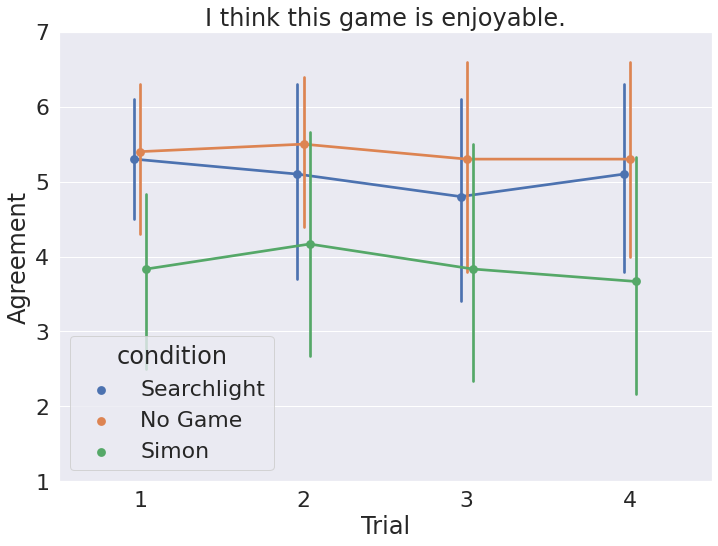

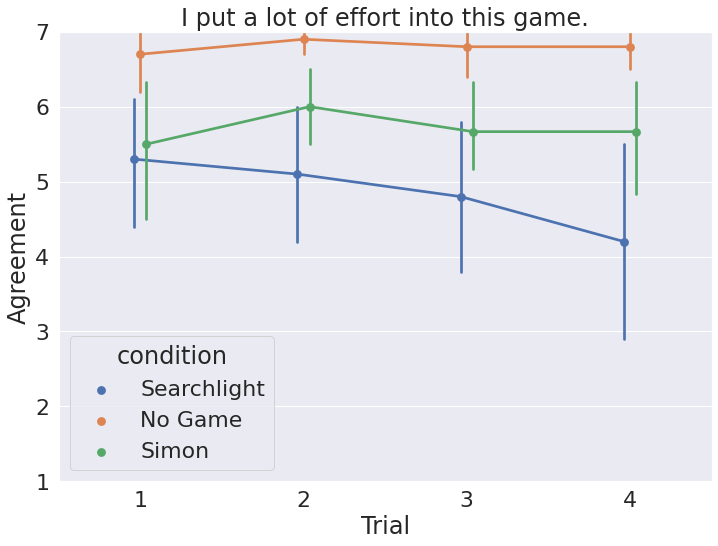

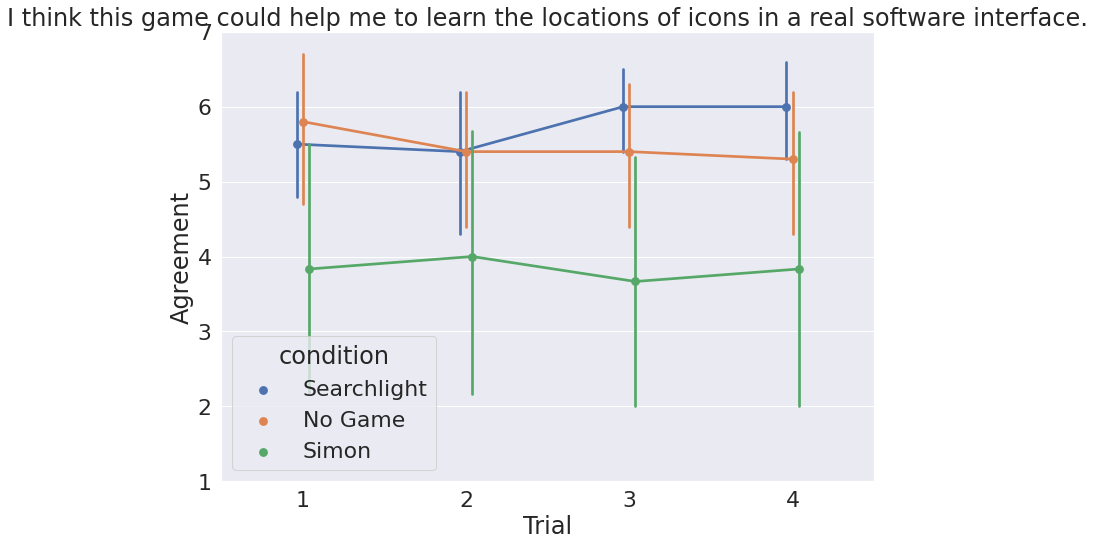

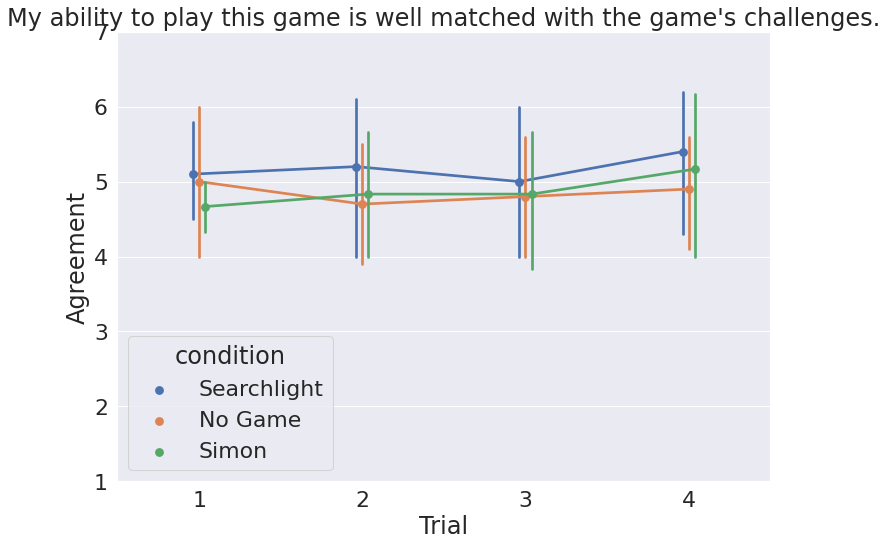

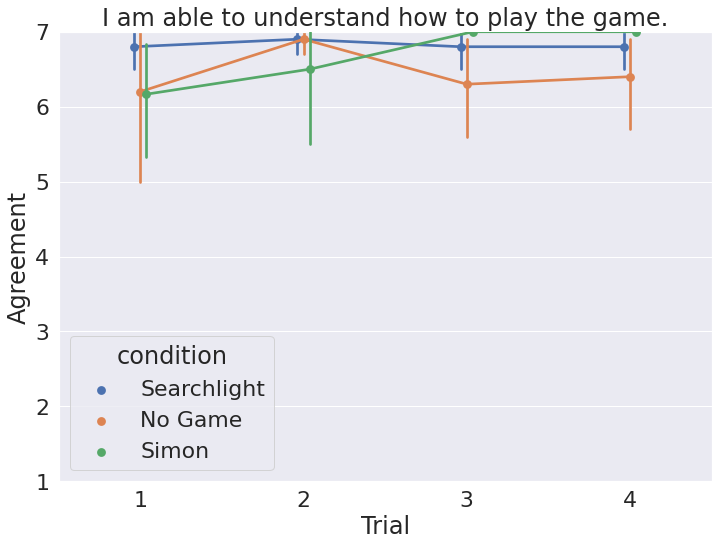

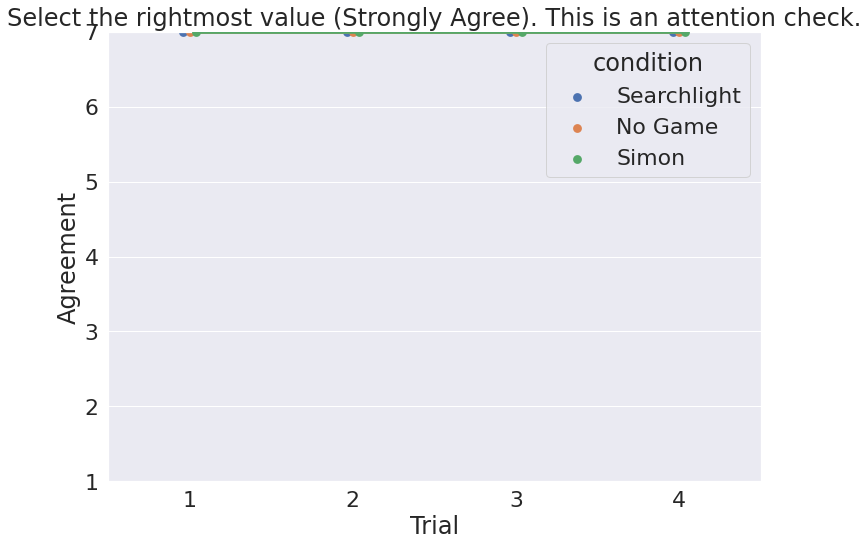

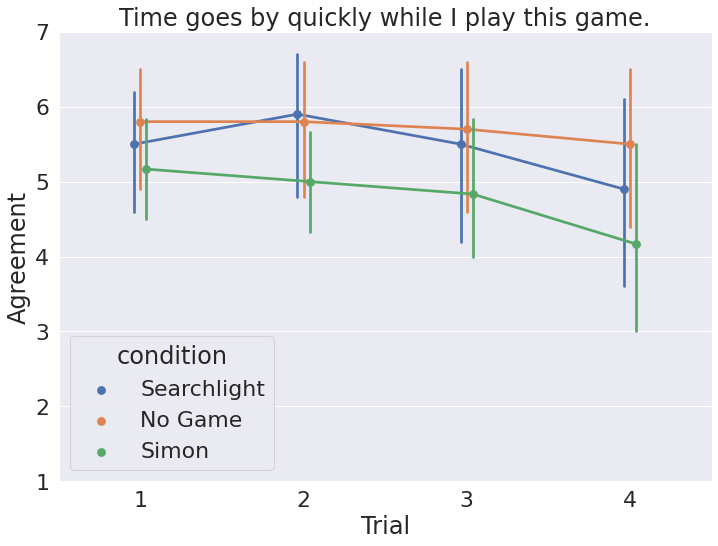

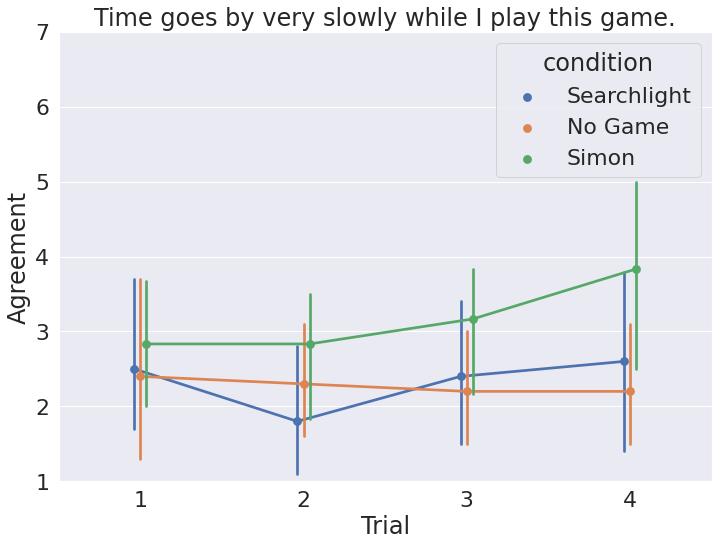

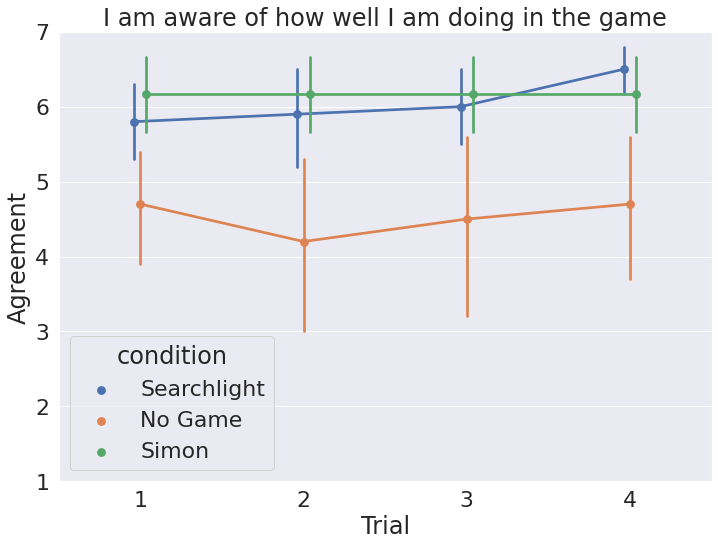

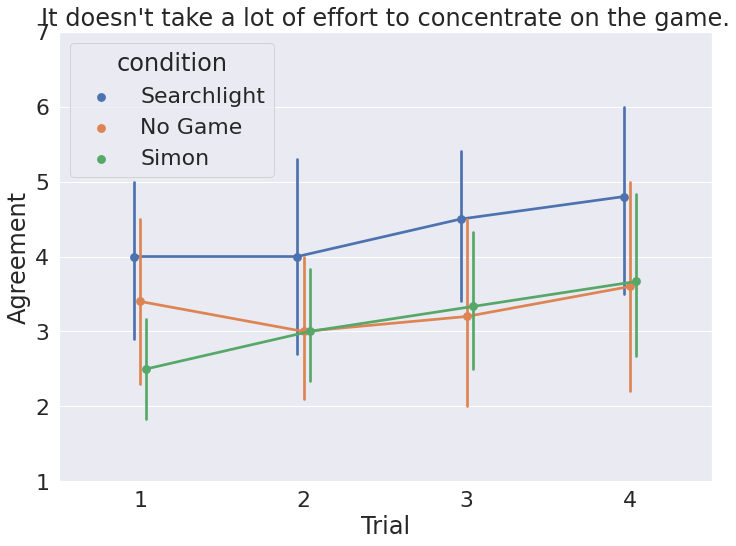

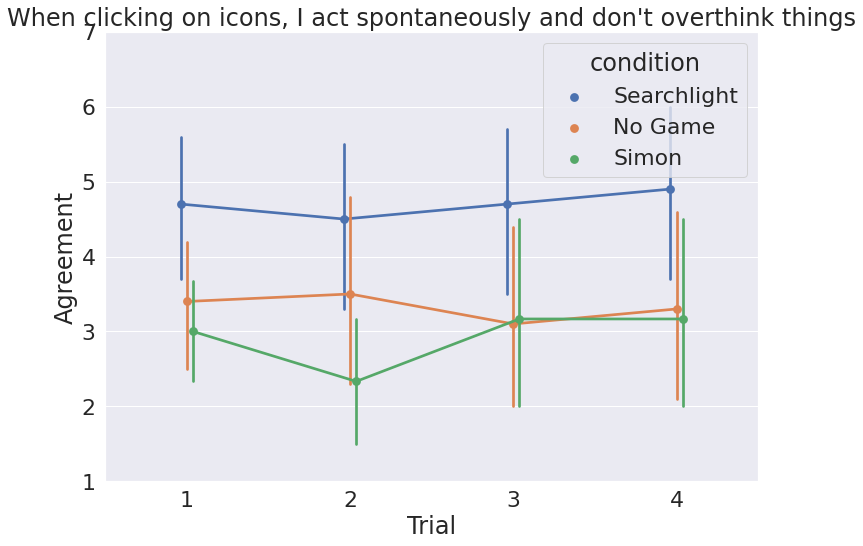

In [75]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/")

for likert_data in FSS_SURVEY_STATEMENTS:
    plt.figure()
    plt.ylim(1, 7)
    sns.pointplot(data=SURVEY, x='breakpoint', y=likert_data, hue='condition', dodge=True, errorbar=('ci', 95)).set(title=FSS_SURVEY_STATEMENTS[likert_data], xlabel="Trial", ylabel="Agreement")
    plt.savefig(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/{likert_data}.png")

<h2>Trial Data</h2>

In [76]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/trial_data/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/trial_data/")

In [77]:
simon_trial_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'training']
simon_trial_data = simon_trial_data_filtered.sort_values(['participantID', 'timeSubmitted'])
# simon_trial_data['trial_order'] = simon_trial_data.groupby('participantID').cumcount() + 1
simon_trial_data['trial_order'] = simon_trial_data_filtered['gameDistributionIndex'] + 1

In [78]:
simon_trial_data['trial_order'].unique()

array([1, 2, 3, 4], dtype=object)

In [79]:
four = simon_trial_data[simon_trial_data['trial_order'] == 4]
four.head()

,trialLogID,participantID,timeSubmitted,pid,condition,prolificID,day,phase,block,trial,...,cumulativeManhattanDistance,cumulativeEuclideanDistance,sequence,manhattanDistanceLog,euclideanDistanceLog,ctForTargetInOrder,targetErrorArray,errorInTrial,treatment,trial_order
480,481,8,2026-01-30 17:58:15.908781,8,SIMON,66c6683f6336ebf638da4db4,1,training,1,1,...,-1,-1.0,"105,81,108",,,"3.4011000001430514,0.9028999998569488,3.245400...","{""correct"":1,""num_errors"":0,""id"":105,""index"":0...",0,simon,4
487,488,8,2026-01-30 17:58:34.924915,8,SIMON,66c6683f6336ebf638da4db4,1,training,1,2,...,-1,-1.0,"105,81,108,138",,,"4.880099999904632,1.0870999999046325,0.9622000...","{""correct"":1,""num_errors"":0,""id"":105,""index"":0...",0,simon,4
493,494,8,2026-01-30 17:58:55.704678,8,SIMON,66c6683f6336ebf638da4db4,1,training,1,3,...,-1,-1.0,"105,81,108,138,44",,,"2.2805,0.9692000000476837,1.4962999999523163,0...","{""correct"":1,""num_errors"":0,""id"":105,""index"":0...",0,simon,4
505,506,8,2026-01-30 17:59:35.936305,8,SIMON,66c6683f6336ebf638da4db4,1,training,1,4,...,-1,-1.0,"105,81,108,138,44,71",,,"7.2156999998092655,0.8554000000953674,2.481,0....","{""correct"":1,""num_errors"":0,""id"":105,""index"":0...",0,simon,4
516,517,8,2026-01-30 18:00:34.325228,8,SIMON,66c6683f6336ebf638da4db4,1,training,1,1,...,-1,-1.0,"105,81,108",,,"3.2266000001430513,1.120699999809265,0.9083000...","{""correct"":1,""num_errors"":0,""id"":105,""index"":0...",0,simon,4


In [80]:
simon_trial_data.columns

Index(['trialLogID', 'participantID', 'timeSubmitted', 'pid', 'condition',
       'prolificID', 'day', 'phase', 'block', 'trial', 'targetID', 'distEdge',
       'distLand', 'nearLandmark', 'isLandmark', 'targetX', 'targetY',
       'clickX', 'clickY', 'euclidean', 'manhattan', 'gameDistributionIndex',
       'cursorWidth', 'ct', 'underGuide', 'errors', 'movement', 'confidence',
       'errorObjects', 'cumulativeManhattanDistance',
       'cumulativeEuclideanDistance', 'sequence', 'manhattanDistanceLog',
       'euclideanDistanceLog', 'ctForTargetInOrder', 'targetErrorArray',
       'errorInTrial', 'treatment', 'trial_order'],
      dtype='object')

In [81]:
searchlight_trial_data_filtered = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase'] == 'training']
searchlight_successful_trials = searchlight_trial_data_filtered[searchlight_trial_data_filtered['manhattan']==0]
searchlight_successful_trials = searchlight_trial_data_filtered[searchlight_trial_data_filtered['errors']==0]
searchlight_successful_trials = searchlight_successful_trials.sort_values(['participantID', 'timeSubmitted'])
searchlight_successful_trials['trial_order'] = searchlight_successful_trials.groupby('participantID').cumcount() + 1
searchlight_successful_trials['block_order'] = searchlight_successful_trials['trial_order'].apply(lambda x: (x - 1) // 6 + 1)

no_game_trial_data_filtered = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase'] == 'training']
no_game_successful_trials = no_game_trial_data_filtered[no_game_trial_data_filtered['manhattan']==0]
no_game_successful_trials = no_game_trial_data_filtered[no_game_trial_data_filtered['errors']==0]
no_game_successful_trials = no_game_successful_trials.sort_values(['participantID', 'timeSubmitted'])
no_game_successful_trials['trial_order'] = no_game_successful_trials.groupby('participantID').cumcount() + 1
no_game_successful_trials['block_order'] = no_game_successful_trials['trial_order'].apply(lambda x: (x - 1) // 6 + 1)

In [82]:
simon_trial_data['targetErrorArray'].to_csv(f"./plots/{FOLDER_NAME}/trial_data/simon_target_error_arrays.csv")

In [83]:
import json
trials_time_per_target = []

def get_target_id_from_simon_sequence(row):
    if row['treatment'] == 'simon':
        if int(row['errorInTrial']) == 0:
            sequence_list = row['sequence'].split(',')
            ct_list = row['ctForTargetInOrder'].split(',')
            # FIXME: move to function, also this was a terrible way to save the errors! 
            error_array = []
            if row['targetErrorArray'] is not None and row['targetErrorArray'] != '-1':
                try:
                    error_array_str = row['targetErrorArray'].split('},{')
                    for i, item in enumerate(error_array_str):
                        if i == 0:
                            item = item + '}'
                        elif i == len(error_array_str) - 1:
                            item = '{' + item
                        else:
                            item = '{' + item + '}'
                        error_array.append(json.loads(item))
                except:
                    pass
            for i in range(0, len(sequence_list)):
                # if error_array[i]["correct"] ==1 and error_array[i]["num_errors"] ==0:
                if error_array[i]["num_errors"] ==0:
                    trials_time_per_target.append({
                        'condition': 'simon',
                        'targetID': int(sequence_list[i]),
                        'ct': float(ct_list[i]),
                        'trial': int(row['trial']),  
                        'block': int(row['gameDistributionIndex'] + 1),
                        'trial_order': int(row['trial_order']),
                        'participantID': int(row['participantID']), 
                        'timeSubmitted': row['timeSubmitted'],
                        'locationInSequence': (i + 1),
                        'distanceFromEndOfSequence': int(len(sequence_list) - (i+1)),
                        'sequence' : row['sequence'],
                        'exposure_count': simon_exposures_counter(len(sequence_list), sequence_list[i], int(row['gameDistributionIndex']))
                    })
    else:
            trials_time_per_target.append({
                'condition': row['treatment'],
                'targetID': row['targetID'],
                'ct': row['ct'],
                'block': int(row['block_order']), 
                'timeSubmitted': row['timeSubmitted']
            })
    return row

In [84]:
trial_data = pd.concat([searchlight_successful_trials, no_game_successful_trials], ignore_index=True)
trial_data = trial_data.append(simon_trial_data, ignore_index=True)

trial_data.apply(lambda row: get_target_id_from_simon_sequence(row), axis=1)

targets_time_per_click = pd.DataFrame(trials_time_per_target)    

# targets_time_per_click = targets_time_per_click[~((targets_time_per_click['condition'] == 'simon') & (targets_time_per_click['exposure_count'] > 15))]


/tmp/ipykernel_23900/4048907440.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trial_data = trial_data.append(simon_trial_data, ignore_index=True)


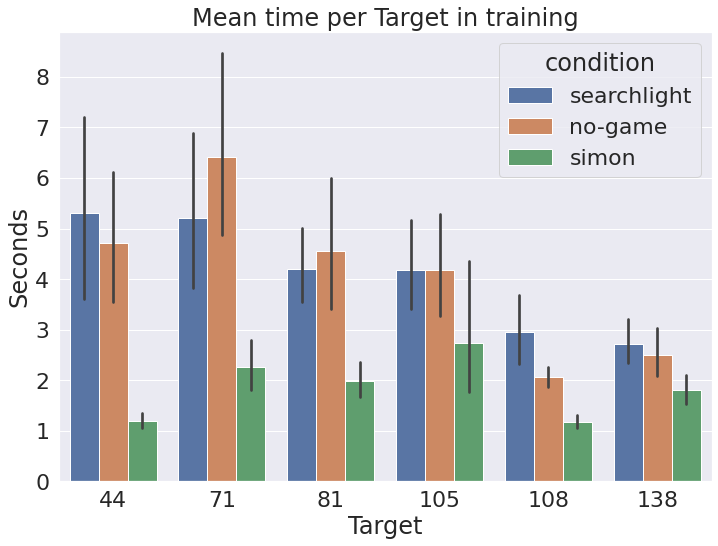

In [86]:
plt.figure()
# sns.pointplot(data=targets_time_per_click, x='targetID', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95)).set(title="Mean time per Target in training", xlabel="Target", ylabel="Seconds")
sns.barplot(data=targets_time_per_click, x='targetID', hue='condition', y=f'ct', dodge=True, ci=95).set(title="Mean time per Target in training", xlabel="Target", ylabel="Seconds")
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/mean_time_per_target.png")

In [ ]:
targets = targets_time_per_click['targetID'].unique()

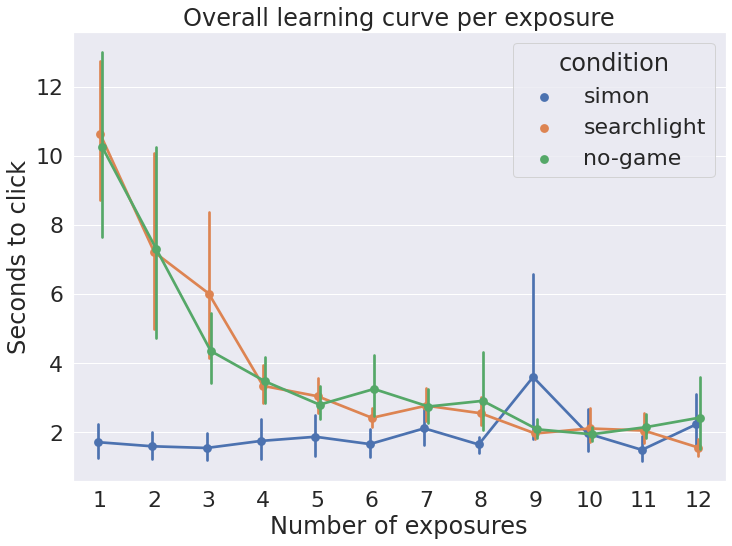

In [ ]:

learning_curve = targets_time_per_click.sort_values(['participantID', 'timeSubmitted'])
learning_curve['target_order'] = learning_curve.apply(lambda row: int(row['exposure_count']) if row['condition']=='simon' else int(row['block']), axis=1)
# FIXME: this needs to be figured out better
learning_curve = learning_curve[learning_curve['target_order'] <=12]
plt.figure()
sns.pointplot(data=learning_curve, x='target_order', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95)).set(title=f"Overall learning curve per exposure", xlabel="Number of exposures", ylabel="Seconds to click")
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/learning_curve_all_targets.png")

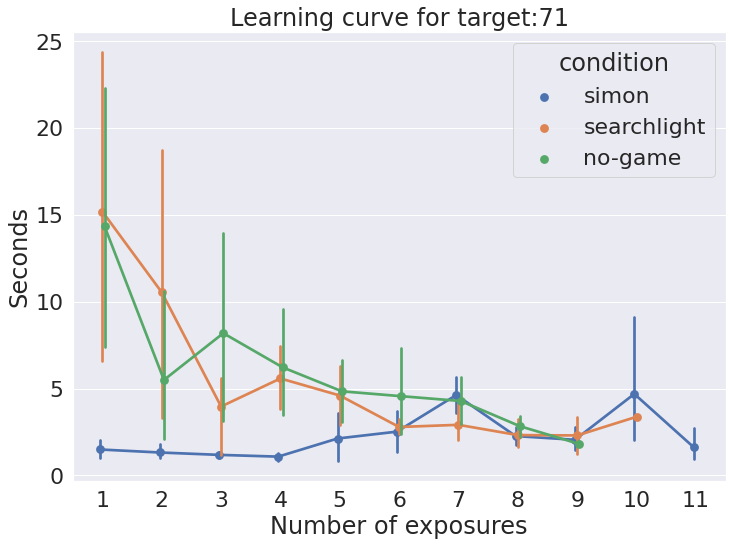

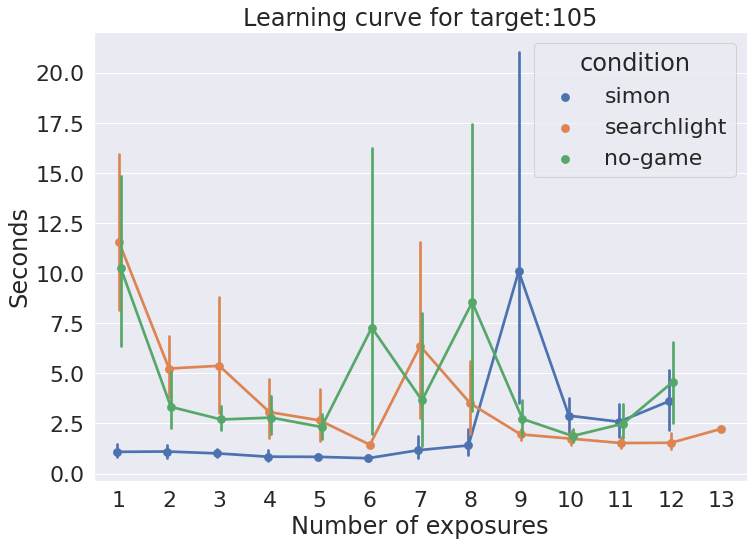

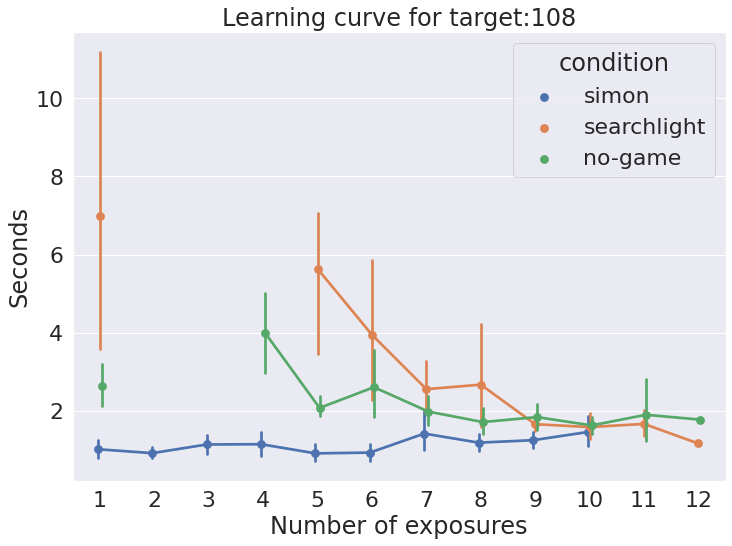

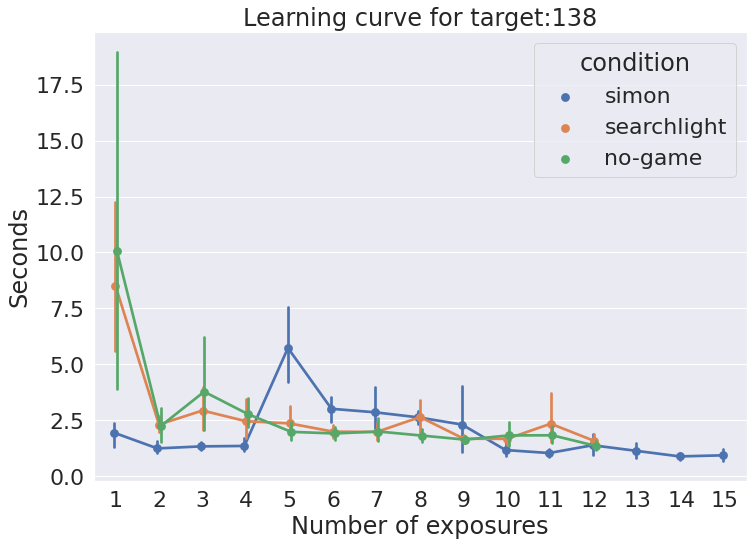

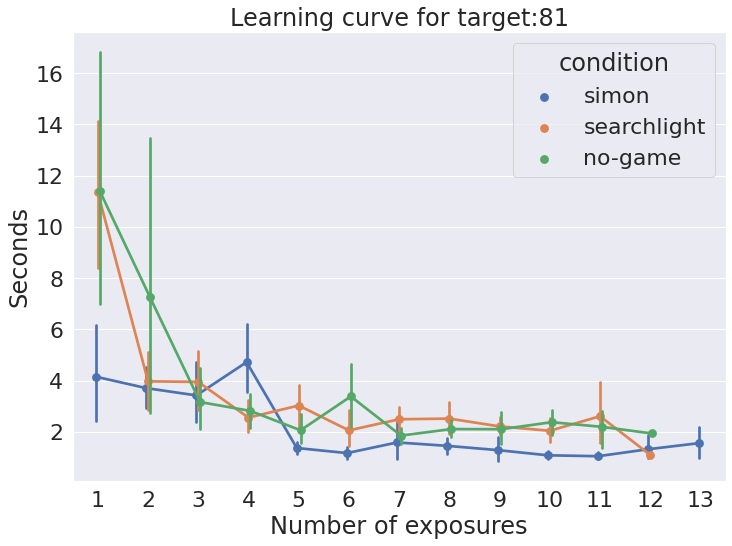

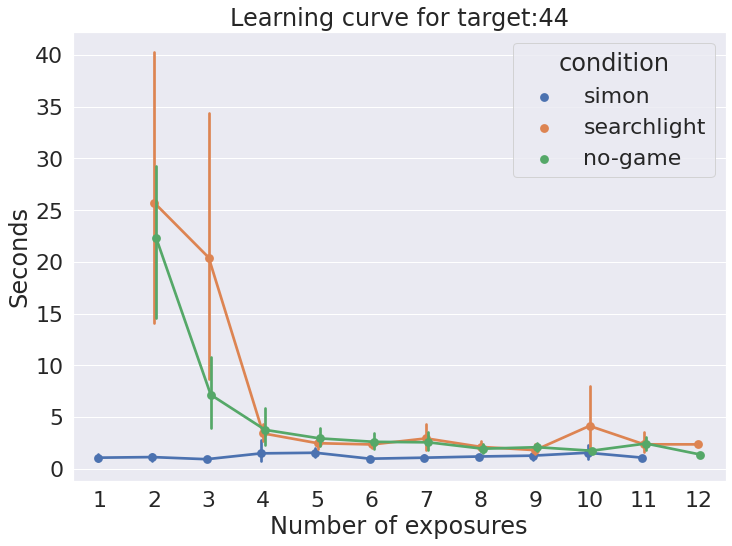

In [ ]:


targets_time_per_click.to_csv(f"./plots/{FOLDER_NAME}/trial_data/targets_time_per_click.csv")

for target in targets:
    target_data = targets_time_per_click[targets_time_per_click['targetID'] == target]
    target_data_ordered = target_data.sort_values(['participantID', 'timeSubmitted'])
    target_data_ordered['target_order'] = target_data_ordered.apply(lambda row: int(row['exposure_count']) if row['condition']=='simon' else int(row['block']), axis=1)
    plt.figure()
    sns.pointplot(data=target_data_ordered, x='target_order', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95)).set(title=f"Learning curve for target:{target}", xlabel="Number of exposures", ylabel="Seconds")
    plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/mean_time_per_target_{str(target)}.png")

<h2>Time to click based on placement in sequence</h2>

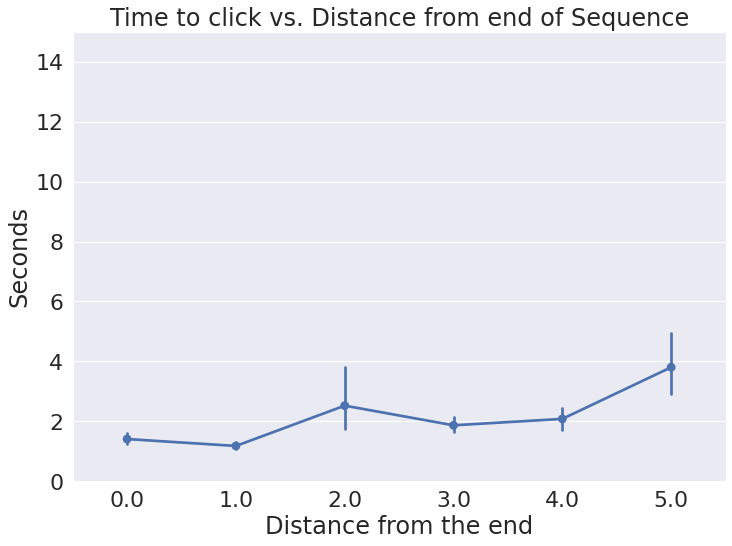

In [ ]:
targets_time_per_click.dropna(inplace=True)


targets_time_per_click['trial_order'] = targets_time_per_click['trial_order'].astype(int)

plt.figure()
sns.pointplot(data=targets_time_per_click, x='distanceFromEndOfSequence', y=f'ct', dodge=True, errorbar=('ci', 95)).set(title=f"Time to click vs. Distance from end of Sequence", xlabel="Distance from the end", ylabel="Seconds")
plt.ylim(0, 15)
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/time_v_distance_from_end_of_sequence.png")



<h2>Memory Test Analysis</h2>

In [ ]:
simon_test_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'testing']
simon_test_data_filtered.columns

Index(['trialLogID', 'participantID', 'timeSubmitted', 'pid', 'condition',
       'prolificID', 'day', 'phase', 'block', 'trial', 'targetID', 'distEdge',
       'distLand', 'nearLandmark', 'isLandmark', 'targetX', 'targetY',
       'clickX', 'clickY', 'euclidean', 'manhattan', 'gameDistributionIndex',
       'cursorWidth', 'ct', 'underGuide', 'errors', 'movement', 'confidence',
       'errorObjects', 'cumulativeManhattanDistance',
       'cumulativeEuclideanDistance', 'sequence', 'manhattanDistanceLog',
       'euclideanDistanceLog', 'ctForTargetInOrder', 'targetErrorArray',
       'errorInTrial', 'treatment'],
      dtype='object')

In [ ]:
searchlight_test_data_filtered = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase'] == 'testing']
searchlight_test_data_ordered = searchlight_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
searchlight_test_data_ordered['test_order'] = searchlight_test_data_ordered.groupby('participantID').cumcount() + 1
searchlight_test_data_ordered['breakpoint'] = searchlight_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1) # seven because of attention checks.
searchlight_test_data_ordered['condition'] = 'Searchlight'


no_game_test_data_filtered = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase'] == 'testing']
no_game_test_data_ordered = no_game_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
no_game_test_data_ordered['test_order'] = no_game_test_data_ordered.groupby('participantID').cumcount() + 1
no_game_test_data_ordered['breakpoint'] = no_game_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1)
no_game_test_data_ordered['condition'] = 'No Game'

simon_test_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'testing']
simon_test_data_ordered = simon_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
simon_test_data_ordered['test_order'] = simon_test_data_ordered.groupby('participantID').cumcount() + 1
simon_test_data_ordered['breakpoint'] = simon_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1)
# simon_test_data_ordered['breakpoint'] = simon_test_data_ordered['breakpoint'].apply(lambda x: x-3 if x>3 else x)
# simon_test_data_ordered['breakpoint'] = simon_test_data_ordered['gameDistributionIndex'].apply(lambda x: 0 if x=='None' else int(x)+1)
simon_test_data_ordered['condition'] = 'Simon'


test_data = pd.concat([searchlight_test_data_ordered, no_game_test_data_ordered, simon_test_data_ordered], ignore_index=True)

In [ ]:
ATTENTION_CHECK_IDS = [4, 8]
test_data = test_data[~test_data["test_order"].isin(ATTENTION_CHECK_IDS)]


test_data = test_data[test_data['targetID'] != 0].reset_index(drop=True)
test_data['targetID'].unique()

array([105, 138,  71, 108,  44,  81])

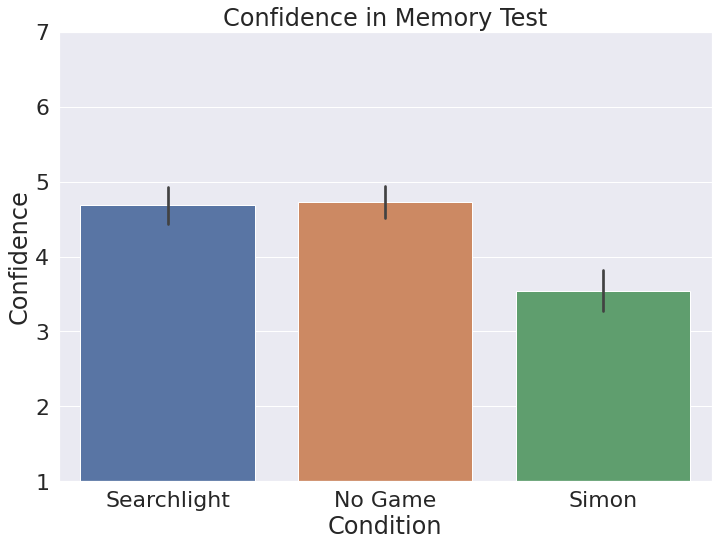

In [ ]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/test_data/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/test_data/")

confidence = test_data[test_data['confidence']>0]

confidence = confidence[~confidence["test_order"].isin(ATTENTION_CHECK_IDS)]
# graph the mean engagement per trial order 
plt.figure()
sns.barplot(data=test_data, x='condition', y=f'confidence', ci=95).set(title="Confidence in Memory Test", xlabel="Condition", ylabel="Confidence")
#sns.pointplot(data=confidence , x='test_order', hue='condition', y=f'confidence', dodge=True, errorbar=('ci', 95)).set(title="Reported confidence in selection", xlabel="Trial", ylabel="Reported Confidence")
plt.ylim(1, 7)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence.png")

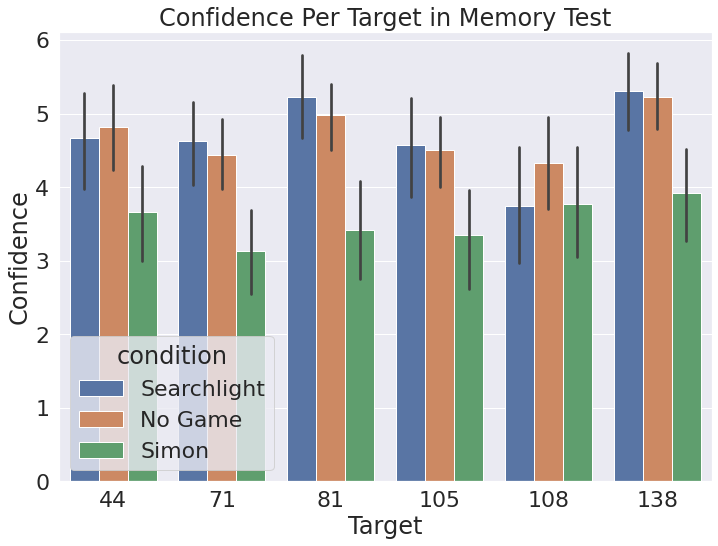

In [88]:
# confidence per target in memory test 
plt.figure()
# sns.pointplot(data=test_data, x='targetID', hue='condition', y=f'confidence', dodge=True, errorbar=('ci', 95)).set(title="Confidence Per Target in Memory Test", xlabel="Target", ylabel="Confidence")
sns.barplot(data=test_data, x='targetID', hue='condition', y=f'confidence', dodge=True, ci=95).set(title="Confidence Per Target in Memory Test", xlabel="Target", ylabel="Confidence")
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence_per_target.png")

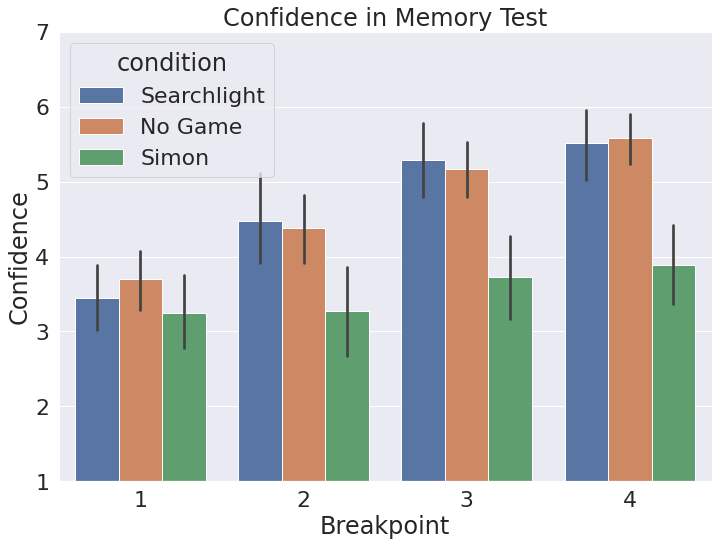

In [ ]:
plt.figure()
sns.barplot(data=test_data, x='breakpoint', y=f'confidence', hue="condition", ci=95).set(title="Confidence in Memory Test", xlabel="Breakpoint", ylabel="Confidence")
plt.ylim(1, 7)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence_per_breakpoint.png")

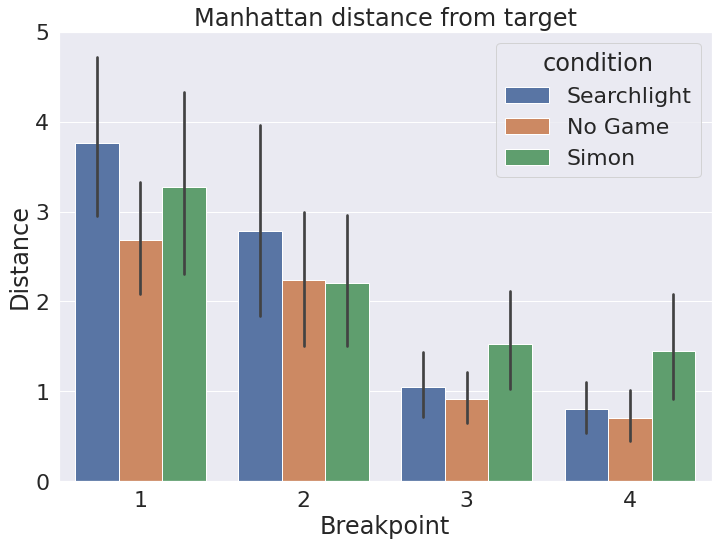

In [ ]:
plt.figure()
sns.barplot(data=test_data, x='breakpoint', y=f'manhattan', hue="condition", ci=95).set(title="Manhattan distance from target", xlabel="Breakpoint", ylabel="Distance")
plt.ylim(0, 5)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/manhattan_per_breakpoint.png")

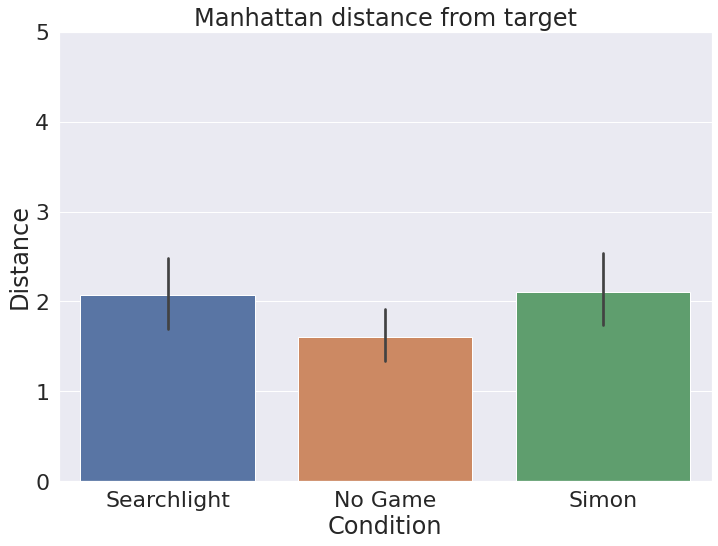

In [ ]:
test_data = test_data[~test_data["test_order"].isin(ATTENTION_CHECK_IDS)]

plt.figure()
sns.barplot(data=test_data, x='condition', y=f'manhattan', ci=95).set(title="Manhattan distance from target", xlabel="Condition", ylabel="Distance")

plt.ylim(0, 5)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/manhattan_test_performance.png")

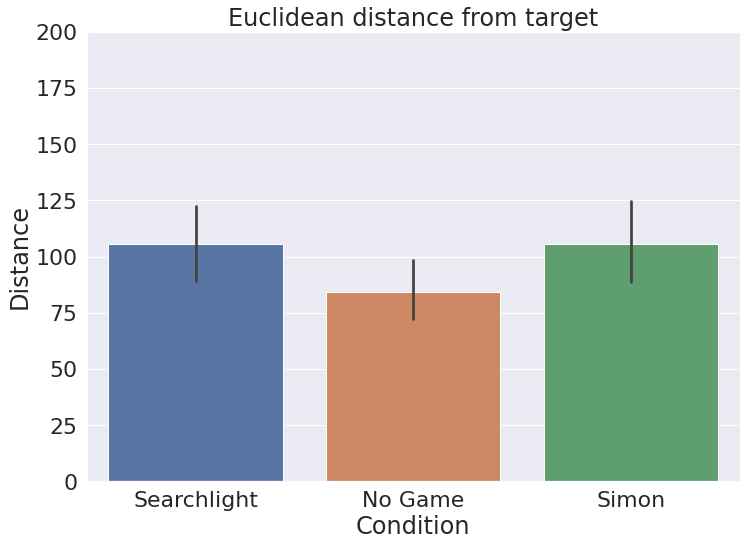

In [ ]:
plt.figure()
sns.barplot(data=test_data, x='condition', y=f'euclidean', ci=95).set(title="Euclidean distance from target", xlabel="Condition", ylabel="Distance")

plt.ylim(0, 200)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/euclidean_test_performance.png")

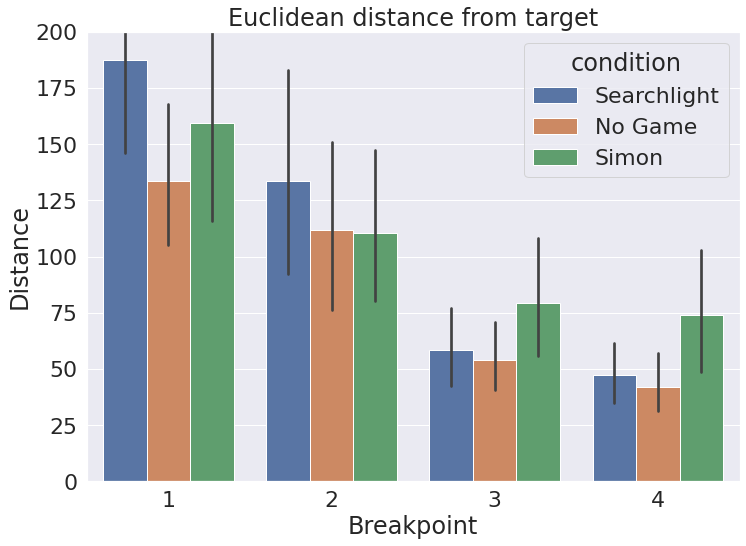

In [ ]:
plt.figure()
sns.barplot(data=test_data, x='breakpoint', y=f'euclidean', hue="condition", ci=95).set(title="Euclidean distance from target", xlabel="Breakpoint", ylabel="Distance")
plt.ylim(0, 200)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/euclidean_per_breakpoint.png")

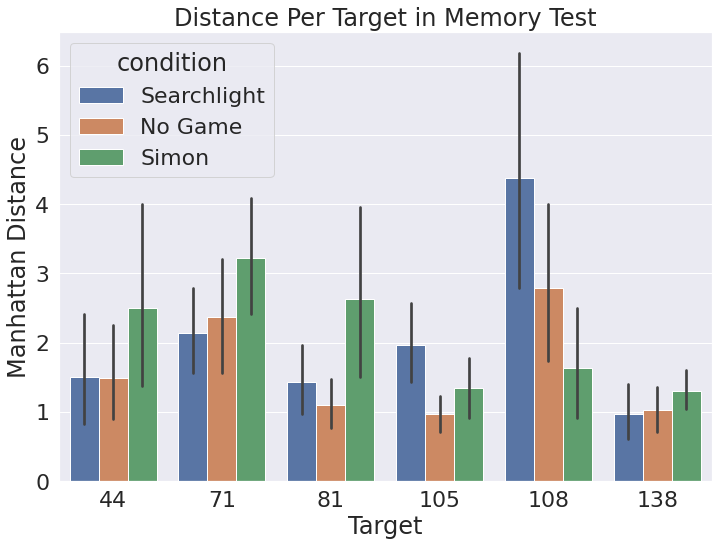

In [89]:
plt.figure()
#sns.pointplot(data=test_data, x='targetID', hue='condition', y=f'manhattan', dodge=True, errorbar=('ci', 95)).set(title="Distance Per Target in Memory Test", xlabel="Target", ylabel="Manhattan Distance")
sns.barplot(data=test_data, x='targetID', hue='condition', y=f'manhattan', dodge=True, ci=95).set(title="Distance Per Target in Memory Test", xlabel="Target", ylabel="Manhattan Distance")
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/distance_per_target.png")

<h2>Sequence Test Analysis</h2>

In [ ]:
simon_sequence_test_data = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase']=="sequence_testing"]
simon_sequence_test_data_ordered = simon_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
simon_sequence_test_data_ordered['sequence_test_order_by_participant'] = simon_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
simon_sequence_test_data_ordered['sequence_test_order'] = simon_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
simon_sequence_test_data_ordered['condition'] = 'simon'

no_game_sequence_test_data = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase']=="sequence_testing"]
no_game_sequence_test_data_ordered = no_game_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
no_game_sequence_test_data_ordered['sequence_test_order_by_participant'] = no_game_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
no_game_sequence_test_data_ordered['sequence_test_order'] = no_game_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
no_game_sequence_test_data_ordered['condition'] = 'no-game'

searchlight_sequence_test_data = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase']=="sequence_testing"]
searchlight_sequence_test_data_ordered = searchlight_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
searchlight_sequence_test_data_ordered['sequence_test_order_by_participant'] = searchlight_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
searchlight_sequence_test_data_ordered['sequence_test_order'] = searchlight_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
searchlight_sequence_test_data_ordered['condition'] = 'searchlight' 

In [ ]:
simon_sequence_test_data.head()

,trialLogID,participantID,timeSubmitted,pid,condition,prolificID,day,phase,block,trial,...,errorObjects,cumulativeManhattanDistance,cumulativeEuclideanDistance,sequence,manhattanDistanceLog,euclideanDistanceLog,ctForTargetInOrder,targetErrorArray,errorInTrial,treatment
173,174,9,2026-01-30 17:44:43.132260,9,NO_GUIDE,59d949cf8fd07a000184247e,1,sequence_testing,1,1,...,,8,382.205175,"81,138,71,105,108,44","2,1,1,1,1,2","96.17692030835673,51.35172830587107,48.5077313...",,,0,simon
283,284,9,2026-01-30 17:47:55.583399,9,NO_GUIDE,59d949cf8fd07a000184247e,1,sequence_testing,1,1,...,,8,438.035763,"138,105,44,81,71,108","2,1,0,2,3,0","82.41965784932621,64.8459713474939,18.02775637...",,,0,simon
317,318,8,2026-01-30 17:49:21.357163,8,NO_GUIDE,66c6683f6336ebf638da4db4,1,sequence_testing,1,1,...,,6,322.136524,"81,138,71,105,108,44","1,1,0,1,0,3","51.419840528729765,55.78530272392541,10.295630...",,,0,simon
361,362,9,2026-01-30 17:51:09.010986,9,NO_GUIDE,59d949cf8fd07a000184247e,1,sequence_testing,1,1,...,,6,430.412466,"71,44,138,108,81,105","6,0,0,0,0,0","376.03324321128844,5.099019513592785,15.620499...",,,0,simon
415,416,8,2026-01-30 17:54:19.052454,8,NO_GUIDE,66c6683f6336ebf638da4db4,1,sequence_testing,1,1,...,,9,532.910603,"138,105,44,81,71,108","1,1,3,0,1,3","67.18630812896329,61.07372593840988,132.823190...",,,0,simon


In [ ]:
sequence_data_remapped = []

def save_to_sequence_data_remapped(row):
    sequence_list = row['sequence'].split(',')
    manhattan_distance_list = row['manhattanDistanceLog'].split(',')
    euclidean_distance_list = row['euclideanDistanceLog'].split(',')
    for i in range(0, len(sequence_list)):
        sequence_data_remapped.append({
            'condition': row['treatment'],
            'sequence': row['sequence'], # FIXME: these should all be in the same order between pilots, and we could check   
            'targetID': str(sequence_list[i]),
            'participantID': int(row['participantID']),
            'timeSubmitted': row['timeSubmitted'],
            'locationInSequence': (i + 1),
            'manhattanDistance': int(manhattan_distance_list[i]),
            'euclideanDistance': float(euclidean_distance_list[i]),
        })
    return row

In [ ]:
sequence_test_data = pd.concat([searchlight_sequence_test_data_ordered, no_game_sequence_test_data_ordered, simon_sequence_test_data_ordered], ignore_index=True)
sequence_test_data.apply(lambda row: save_to_sequence_data_remapped(row), axis=1)

,trialLogID,participantID,timeSubmitted,pid,condition,prolificID,day,phase,block,trial,...,manhattanDistanceLog,euclideanDistanceLog,treatment,sequence_test_order_by_participant,sequence_test_order,gameDistributionIndex,cursorWidth,ctForTargetInOrder,targetErrorArray,errorInTrial
0,265,1,2026-01-30 16:58:22.268840,1,searchlight,61bb396840db417c1a138e3d,1,sequence_testing,1,1,...,"0,2,8,2,12,1","5.8309518948453,74.65252842335616,344.61572802...",searchlight,1,1,NaN,NaN,NaN,NaN,NaN
1,446,1,2026-01-30 17:02:42.141657,1,searchlight,61bb396840db417c1a138e3d,1,sequence_testing,2,1,...,"0,0,0,0,2,14","24.207436873820413,8.246211251235321,6.4031242...",searchlight,2,1,NaN,NaN,NaN,NaN,NaN
2,585,1,2026-01-30 17:05:43.761463,1,searchlight,61bb396840db417c1a138e3d,1,sequence_testing,3,1,...,"1,0,4,12,10,1","50.96076922496363,14.317821063276352,173.00289...",searchlight,3,2,NaN,NaN,NaN,NaN,NaN
3,697,1,2026-01-30 17:08:14.052160,1,searchlight,61bb396840db417c1a138e3d,1,sequence_testing,4,1,...,"0,0,0,0,0,1","8.246211251235321,17,17.029386365926403,13.928...",searchlight,4,2,NaN,NaN,NaN,NaN,NaN
4,106,2,2026-01-30 16:53:27.741742,2,searchlight,697a41fd7e1231053d4efcdf,1,sequence_testing,1,1,...,"3,1,1,2,8,9","163.1502375113196,77.1621668954417,48.38388161...",searchlight,1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,663,16,2026-01-30 18:14:10.469285,16,simon,62b055a21e169809861b173d,1,sequence_testing,1,1,...,"0,0,0,0,2,2","5.385164807134505,29.410882339705484,37.536648...",simon,4,2,3.0,75.0,,,0.0
100,662,17,2026-01-30 18:14:08.623962,17,simon,60392f725862f13f0fe248fd,1,sequence_testing,1,1,...,"1,4,2,2,2,1","62.008063991709975,161.44348856488455,74.33034...",simon,1,1,0.0,75.0,,,0.0
101,675,17,2026-01-30 18:16:40.413250,17,simon,60392f725862f13f0fe248fd,1,sequence_testing,1,1,...,"2,2,0,1,2,2","82.75868534480232,124.40257232067188,16.492422...",simon,2,1,1.0,75.0,,,0.0
102,687,17,2026-01-30 18:18:50.853747,17,simon,60392f725862f13f0fe248fd,1,sequence_testing,1,1,...,"1,0,1,1,1,1","66.12110101926615,17.804493814764854,43.185645...",simon,3,2,2.0,75.0,,,0.0


In [ ]:


def getMeanManhattanDistanceFromString(s: str)-> int:
    split_s = s.split(',')
    total =0
    for substring in split_s:
        total+=int(substring)
    return total/len(split_s)


def getMeanEuclideanDistanceFromString(s: str)-> float:
    split_s = s.split(',')
    total =0
    for substring in split_s:
        total+=float(substring)
    return total/len(split_s)

sequence_test_data['mean_manhattan_distance_per_target'] = sequence_test_data['manhattanDistanceLog'].apply(lambda x: getMeanManhattanDistanceFromString(x))
sequence_test_data['mean_euclidean_distance_per_target'] = sequence_test_data['euclideanDistanceLog'].apply(lambda x: getMeanEuclideanDistanceFromString(x))


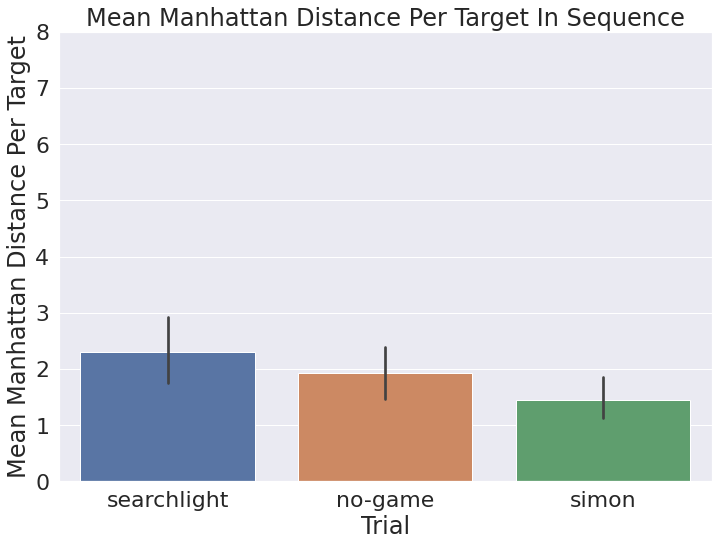

In [ ]:
plt.figure()
sns.barplot(data=sequence_test_data, x='condition', y=f'mean_manhattan_distance_per_target', ci=95).set(title="Mean Manhattan Distance Per Target In Sequence", xlabel="Trial", ylabel="Mean Manhattan Distance Per Target")
plt.ylim(0,8)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_mean_manhattan_distance_per_targets.png")

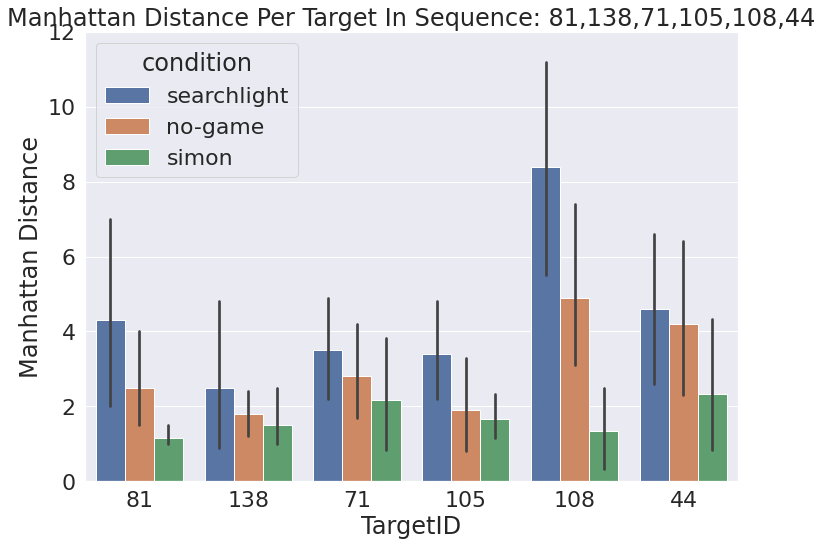

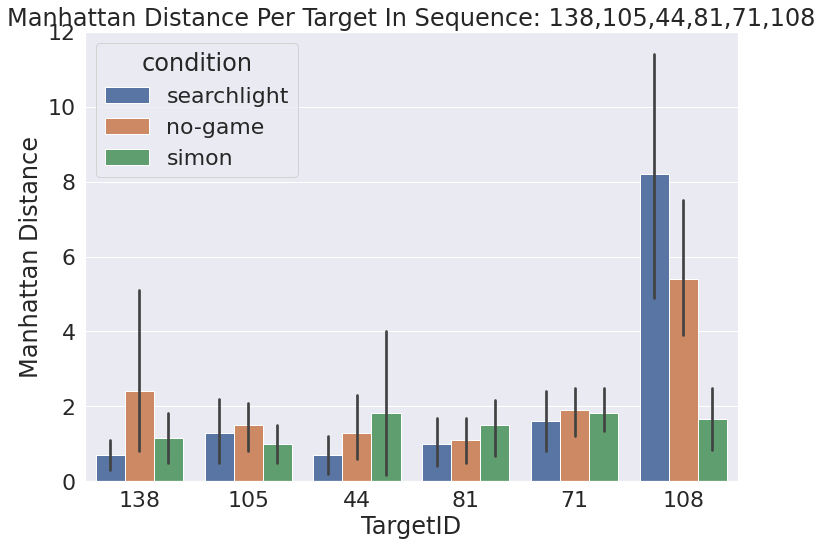

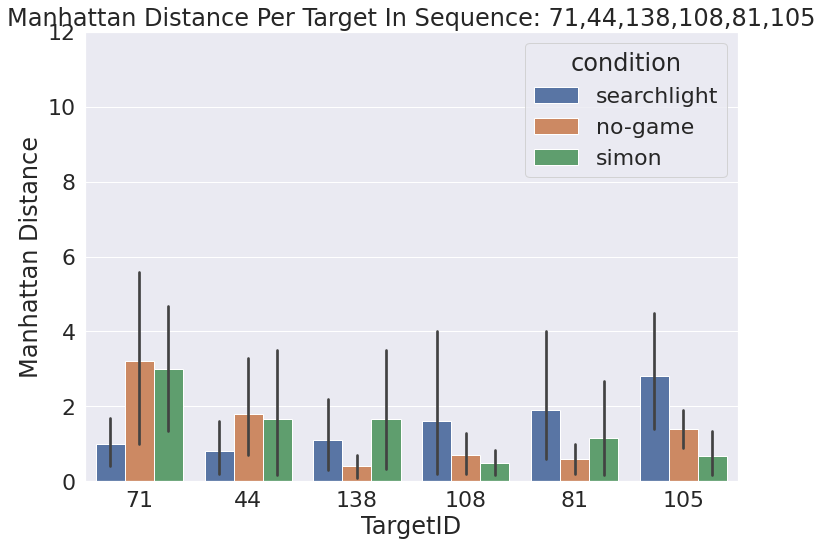

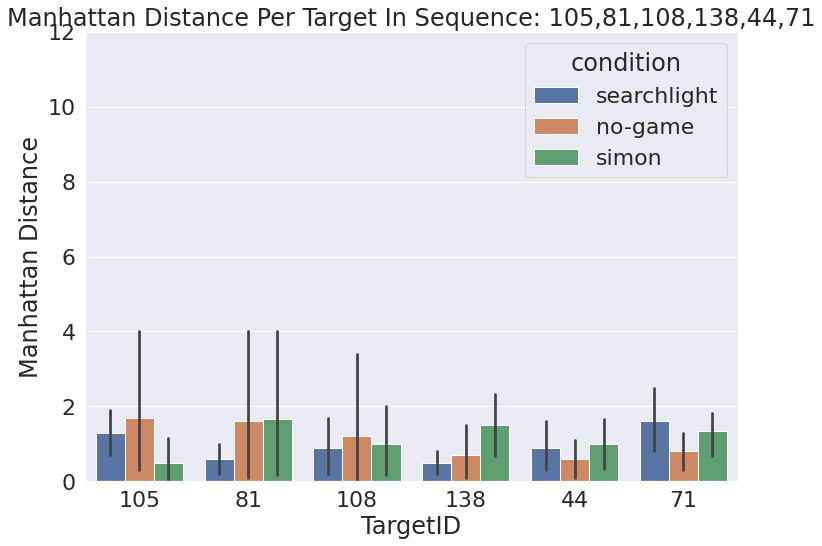

In [ ]:
test_sequences = sequence_test_data['sequence'].unique()

sequence_data_remapped = pd.DataFrame(sequence_data_remapped)   

for sequence in test_sequences:
    sequence_data = sequence_data_remapped[sequence_data_remapped['sequence'] == sequence]
    plt.figure()
    sns.barplot(data=sequence_data, x='targetID', y=f'manhattanDistance', hue='condition', ci=95).set(title=f"Manhattan Distance Per Target In Sequence: {sequence}", xlabel="TargetID", ylabel="Manhattan Distance")
    plt.ylim(0,12)
    plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_manhattan_distance_per_targets_sequence_{sequence}.png")